## Multiple Classification

In those problems we are trying to find the class of an object, where we can have more that 2 classes to choose from

## Importing the Modules

In [563]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Setting the Device Agnostic Code

In [564]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(device)

cuda


## Defining the Hyper Parameters

In [565]:
N_SAMPLES = 1_000
N_FEATURES = 2
N_CLASSES = 4
RANDOM_SEED = 9

TEST_PROP = 0.2

H1_SIZE = 64
H2_SIZE = 128
H3_SIZE = 256
H4_SIZE = 512
H5_SIZE = 1048
H6_SIZE = 2096
H7_SIZE = 2096
H8_SIZE = 2096
H9_SIZE = 1048
H10_SIZE = 512
H11_SIZE = 256
H12_SIZE = 128
H13_SIZE = 64

LR = 1e-1
EPOCHS = 10_000

## Creating the Dataset

In [566]:
x, y = make_blobs(n_samples=N_SAMPLES, n_features=N_FEATURES, centers=N_CLASSES, random_state=RANDOM_SEED, cluster_std=1.5)

print(len(x), x.shape)
print(len(y), y.shape)

1000 (1000, 2)
1000 (1000,)


## Plotting the Data

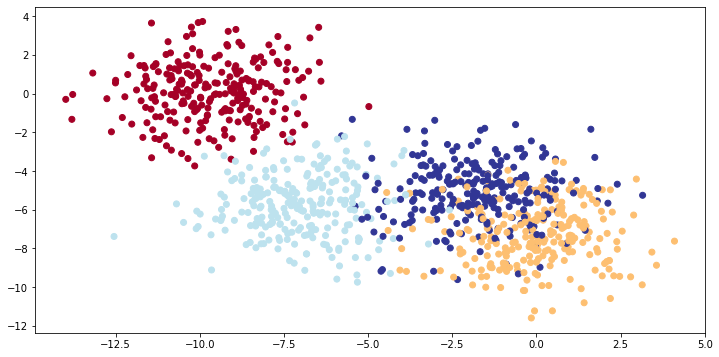

In [567]:
plt.figure(figsize=(12, 6))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Converting the Dataset into Tensors

In [568]:
x = torch.from_numpy(x).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

## Splitting the Dataset into Training and Test Sets

In [569]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=TEST_PROP)

print(x_train.shape, type(x_train))

torch.Size([800, 2]) <class 'torch.Tensor'>


## Transforming the Labels

In [570]:
y_train = y_train.reshape(len(y_train), 1)
y_test = y_test.reshape(len(y_test), 1)

print(y_train.shape)

torch.Size([800, 1])


## Moving Tensors to Device

In [571]:
x_train = x_train.to(device)
y_train = y_train.to(device)
x_test = x_test.to(device)
y_test = y_test.to(device)

## Creating the Model

In [572]:
class Blob_Model(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear_stack = nn.Sequential(
            nn.Linear(in_features=N_FEATURES, out_features=H1_SIZE),
            nn.ReLU(),
            nn.Linear(in_features=H1_SIZE, out_features=H2_SIZE),
            nn.ReLU(),
            nn.Linear(in_features=H2_SIZE, out_features=H3_SIZE),
            nn.ReLU(),
            nn.Linear(in_features=H3_SIZE, out_features=H4_SIZE),
            nn.ReLU(),
            nn.Linear(in_features=H4_SIZE, out_features=H5_SIZE),
            nn.ReLU(),
            nn.Linear(in_features=H5_SIZE, out_features=H6_SIZE),
            nn.ReLU(),
            nn.Linear(in_features=H6_SIZE, out_features=H7_SIZE),
            nn.ReLU(),
            nn.Linear(in_features=H7_SIZE, out_features=H8_SIZE),
            nn.ReLU(),
            nn.Linear(in_features=H8_SIZE, out_features=H9_SIZE),
            nn.ReLU(),
            nn.Linear(in_features=H9_SIZE, out_features=H10_SIZE),
            nn.ReLU(),
            nn.Linear(in_features=H10_SIZE, out_features=H11_SIZE),
            nn.ReLU(),
            nn.Linear(in_features=H11_SIZE, out_features=H12_SIZE),
            nn.ReLU(),
            nn.Linear(in_features=H12_SIZE, out_features=H13_SIZE),
            nn.ReLU(),
            nn.Linear(in_features=H13_SIZE, out_features=N_CLASSES)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_stack(x)

## Initializing the Model

In [573]:
model = Blob_Model().to(device)

print(model)

Blob_Model(
  (linear_stack): Sequential(
    (0): Linear(in_features=2, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=256, bias=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=512, bias=True)
    (7): ReLU()
    (8): Linear(in_features=512, out_features=1048, bias=True)
    (9): ReLU()
    (10): Linear(in_features=1048, out_features=2096, bias=True)
    (11): ReLU()
    (12): Linear(in_features=2096, out_features=2096, bias=True)
    (13): ReLU()
    (14): Linear(in_features=2096, out_features=2096, bias=True)
    (15): ReLU()
    (16): Linear(in_features=2096, out_features=1048, bias=True)
    (17): ReLU()
    (18): Linear(in_features=1048, out_features=512, bias=True)
    (19): ReLU()
    (20): Linear(in_features=512, out_features=256, bias=True)
    (21): ReLU()
    (22): Linear(in_features=256, out_features=128, bias=True)
    (23): ReLU()
  

## Converting the Model Logits to Labels

### Printing the Model's Logits

In [574]:
model.eval()
with torch.inference_mode():
    logits = model(x_test)

print(logits[:5])

tensor([[ 0.0332, -0.0381,  0.0302, -0.0578],
        [ 0.0332, -0.0381,  0.0302, -0.0578],
        [ 0.0332, -0.0381,  0.0302, -0.0578],
        [ 0.0332, -0.0381,  0.0302, -0.0578],
        [ 0.0333, -0.0381,  0.0302, -0.0578]], device='cuda:0')


### Converting the Model's Logits into Probabilities

In [575]:
probs = torch.softmax(logits, dim=1) # dim=1 to apply 'softmax' per row

print(probs[:5])
print(probs[0].sum())

tensor([[0.2603, 0.2424, 0.2596, 0.2377],
        [0.2603, 0.2424, 0.2596, 0.2377],
        [0.2603, 0.2424, 0.2596, 0.2377],
        [0.2603, 0.2424, 0.2596, 0.2377],
        [0.2603, 0.2424, 0.2596, 0.2377]], device='cuda:0')
tensor(1., device='cuda:0')


### Converting the Probabilities into Labels

In [576]:
labels = probs.argmax(dim=1) # To get the index of the maximum probability
labels = labels.reshape(len(labels), 1) # For the `correct` shape

print(labels[:5])

tensor([[0],
        [0],
        [0],
        [0],
        [0]], device='cuda:0')


## Setting up the Loss Function and the Optimizer

In [577]:
# For 'cross entropy' we need the labels into row-vector format and 'long' data type (torch.int64)
loss_fn = nn.CrossEntropyLoss() # Takes as input Logits (very usefull for unbalance sets)
optimizer = optim.SGD(model.parameters(), lr=LR)

## Creating an Accuracy Metric

In [578]:
def accuracy_fn(preds, labels):
    return (torch.sum(preds == labels).item() / len(preds)) * 100

## Creating the Training and Evaluating loop

In [579]:
def fit(model, epochs, x_train, y_train, x_test, y_test, loss_fn, accuracy_fn, optimizer):
    losses , accs = [], []

    for epoch in range(1, epochs + 1):
        model.train()

        logits = model(x_train)

        loss = loss_fn(logits, y_train.reshape(-1).long())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        model.eval()
        with torch.inference_mode():
            test_logits = model(x_test)
            test_loss = loss_fn(test_logits, y_test.reshape(-1).long())
            test_acc = accuracy_fn(torch.softmax(test_logits, dim=1).argmax(dim=1).reshape(-1, 1), y_test)

            losses.append(test_loss)
            accs.append(test_acc)

        if epoch % (epochs / 10) == 0:
            print(f"Epoch: {epoch} | Loss: {test_loss:.4f} | Acc(%): {test_acc:.2f}%")

    return losses, accs

## Training the Model

In [580]:
l1, a1 = fit(model, EPOCHS, x_train, y_train, x_test, y_test, loss_fn, accuracy_fn, optimizer)

Epoch: 1000 | Loss: 1.3891 | Acc(%): 22.00%
Epoch: 2000 | Loss: 1.3886 | Acc(%): 22.00%
Epoch: 3000 | Loss: 0.3192 | Acc(%): 86.50%
Epoch: 4000 | Loss: 0.3274 | Acc(%): 86.00%
Epoch: 5000 | Loss: 0.3057 | Acc(%): 87.00%
Epoch: 6000 | Loss: 0.3346 | Acc(%): 86.50%
Epoch: 7000 | Loss: 0.3074 | Acc(%): 87.50%
Epoch: 8000 | Loss: 0.3297 | Acc(%): 86.00%
Epoch: 9000 | Loss: 0.3797 | Acc(%): 84.50%
Epoch: 10000 | Loss: 0.4120 | Acc(%): 82.00%


## Making Predictions

In [581]:
model.eval()
with torch.inference_mode():
    labels = torch.softmax(model(x_test), dim=1).argmax(dim=1).reshape(-1, 1)

print(labels[:10] == y_test[:10])

tensor([[False],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [False],
        [ True],
        [ True]], device='cuda:0')


## Plotting the Boundaries

In [582]:
import requests
from pathlib import Path

if not Path("helper_functions.py").is_file():
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

In [583]:
from helper_functions import plot_decision_boundary

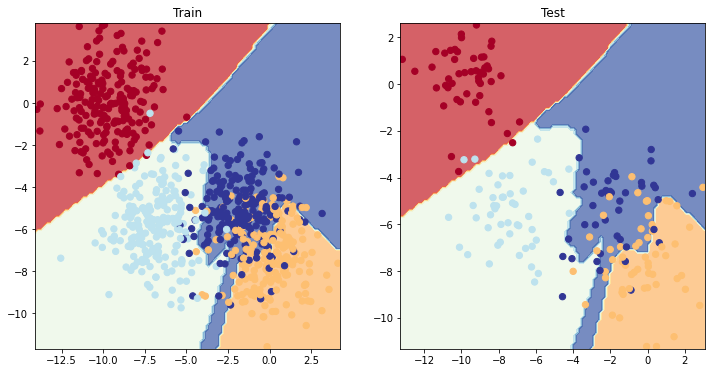

In [584]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model, x_test, y_test)

Note that, in this problem we could use a `linear` problem, becuase the data can be splitted using a straight line (they are **linear seperable**).

## Evaluating Metrics

We are a lot of **Evaluating Metrics** to see how well our model is performing. Those are:
1. Accuracy: Out of n samples how many did the model predict correctly (good when we have balacne classes)
2. Precission
3. Recall
4. F1-Score
5. Confusion Metrix
6. Classification Report

* Precission-Recall tradeoff

We can use the library `torchmetrics` for those metrics (we need to becarefull the metric object to be at the same device as the Model).